# PHYS 321 Coding Lab #4: Luminosity Functions with SDSS

In this coding lab, we will construct a galaxy luminosity function using SDSS data. (Note: I am indebted to Prof. Andrey Kravtsov, who kindly shared with me some materials from a graduate-level hands-on course on galaxies that he taught at the University of Chicago a few years ago. Parts of this lab are adapted from some of the activities that he did with his class)

## Make a copy of the notebook

We're not going to learn new git things today. (Yay?) If you're looking at this notebook, you've presumably pulled successfully from my repo. All you have to do at this point (if you haven't already) is to make a copy of the notebook with your initials, and to work in that copy. Don't forget to commit early and often!

## Reading in SDSS data

In Coding Lab 01, we learned how to look at images of galaxies taken by SDSS. These images are taken in five different filters known as $u$, $g$, $r$, $i$, and $z$. By measuring the flux coming through each filter, one can get a rough sense for the spectrum of a galaxy, as the following plots show:

<div>
<img src="images/ugriz.png" width="600">
</div>
<center>
    Image credit: A. Kravtsov
</center>

The right column shows the spectra (solid black lines) of three galaxies, whose images are shown in the left column. Recall that visible light has a wavelength range of $\sim 400\,\textrm{nm}$ to $\sim 700\,\textrm{nm}$. Thus, one sees that the $u$ filter falls in the ultraviolet regime, $g$ is greenish-blue visible light, $r$ is yellowish-red visible light, and both $i$ and $z$ are infrared filters. Image processing pipelines in surveys like SDSS will typically output a number for each of $u$, $g$, $r$, $i$, $z$. Each number is the flux of the object as seen through that filter, expressed as a magnitude. To get a sense for the colour of an object, we can compute $g-r$. Since the smaller the magnitude the greater the flux (remember?), objects with smaller $g-r$ are bluer. Indeed, in the picture above one sees that as I go from top to bottom, $g-r$ gets smaller and the galaxies look visually bluer.

Once this sort of **_photometric_** data has been taken, it is used alongside other information (such as the surface brightness profiles) to help determine which objects are worth following up. Objects that are marked for follow-up are then observed **_spectroscopically_**, producing detailed spectra like the black solid lines shown above.

One of the wonderful things about a project like SDSS is that all the data is eventually made public. This has revolutionized astronomy, because there's only so much that scientists within the SDSS collaboration itself can do. With publicly available data, anyone with a good idea can do good science! Periodically, SDSS will release processed data in data releases (DRs). The latest and greatest release is currently DR16. To keep things managable, we will look at some data from DR8. This will already contain lots and lots of galaxies, more than enough for what we're trying to do.

Download the file ``SDSSspecgalsDR8full.fit`` from myCourses. Put it somewhere on your hard drive. Inside your repo is a perfectly good place, **_but do not commit the file_**. It is in general bad practice to commit large files. (Which is why Github rejects files larger than 100Mb). 

We'll now go ahead and read in this file. A short function has been written for you to read in these SDSS data. (It's not too complicated and uses functions built into ``astropy``, but this saves you from having to look up syntax. Take a look in ``tools.py`` if you're curious as to how it's done).

In [42]:
import numpy as np
from tools import read_sdss_fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make modifications to the location of the file if necessary
galaxy_sample = read_sdss_fits('data/SDSSspecgalsDR8full.fit')

If you look at the ``galaxy_sample``, you'll see that it's an array:

In [3]:
type(galaxy_sample)

numpy.ndarray

This is no ordinary array though! This is an advanced type of array known as a [structured array](https://docs.scipy.org/doc/numpy/user/basics.rec.html). Each row represents an object that has been seen, processed, and catalogued by SDSS at the point of DR8. If I look at the first row, I get:

In [4]:
galaxy_sample[0]

(49.29680543, 1.04740689, 51929, 413, 362, b'GALAXY', 0.06682626, 1.4548099e-05, 1.1661363, 102.18597, 10.241167, 0.28176558, 0.38849032, 15.962094, 18.807072, 0.01534338, 18.523092, 0.14436838, 16.652025, 0.00524645, 15.917897, 0.00368556, 15.476031, 0.00361971, 15.16455, 0.00778373, 18.520105, 0.16478391, 16.5931, 0.00522725, 15.917929, 0.00368556, 15.492118, 0.00361926, 4.447478, 9.569142, 0.0253401, 0.17621823, 0., 6.1842713, 0.0516947, 16.037031, 0.21426748, 15.469452, 0.00393327, 15.917929, 0.00368556, -6112.5957, -864.7448, 0.47491622, 0.00682513, 0.49937472, 0.00546618, 104.648384, 3.0830321, 17.48164, 3.071263, 1.5830613, 0.02672824, 3, 10.696085, 0.13164578, 1237645943975837722, 465096199691593728)

All of these numbers represent something about the galaxy! But how do we know what they are? A description of each number is given by ``dtype``:

In [5]:
galaxy_sample.dtype

dtype((numpy.record, [('ra', '>f8'), ('dec', '>f8'), ('mjd', '>i4'), ('plate', '>i2'), ('fiberID', '>i2'), ('class', 'S32'), ('z', '>f4'), ('zErr', '>f4'), ('rChi2', '>f4'), ('velDisp', '>f4'), ('velDispErr', '>f4'), ('extinction_r', '>f4'), ('extinction_g', '>f4'), ('petroMag_r', '>f4'), ('psfMag_r', '>f4'), ('psfMagErr_r', '>f4'), ('modelMag_u', '>f4'), ('modelMagErr_u', '>f4'), ('modelMag_g', '>f4'), ('modelMagErr_g', '>f4'), ('modelMag_r', '>f4'), ('modelMagErr_r', '>f4'), ('modelMag_i', '>f4'), ('modelMagErr_i', '>f4'), ('modelMag_z', '>f4'), ('modelMagErr_z', '>f4'), ('cmodelMag_u', '>f4'), ('cmodelMagErr_u', '>f4'), ('cmodelMag_g', '>f4'), ('cmodelMagErr_g', '>f4'), ('cmodelMag_r', '>f4'), ('cmodelMagErr_r', '>f4'), ('cmodelMag_i', '>f4'), ('cmodelMagErr_i', '>f4'), ('petroR50_r', '>f4'), ('petroR90_r', '>f4'), ('petroR50Err_r', '>f4'), ('petroR90Err_r', '>f4'), ('fracdeV_r', '>f4'), ('expRad_r', '>f4'), ('expRadErr_r', '>f4'), ('deVRad_r', '>f4'), ('deVRadErr_r', '>f4'), ('deVM

We see, for instance, that the first two entries correspond to the RA and DEC of the object, respectively. One approach to using this list would be to count the entries. For example, we could remember that the 7th column corresponds to the redshift. But structured arrays are much smarter than that! I can use the names of the columns instead of indices. For example, if I wanted to return an array with all the redshifts, I would just say:

In [6]:
galaxy_sample['z']

array([0.06682626, 0.12978089, 0.03616738, ..., 0.08846109, 0.09007201,
       0.05224518], dtype=float32)

Incidentally, now is also a good time to practice some advanced slicing techniques. One handy trick is to feed an array a bunch of Boolean (i.e. `True`/`False`) entries. For example, if I have an array

In [7]:
arr = np.array([2, 5, 8, 9])

I can feed in `np.array([True, True, False, True])` to extract

In [8]:
arr[np.array([True, True, False, True])]

array([2, 5, 9])

This isn't so useful if I have to type in `True` and `False` by hand. But as an example, I can do things like

In [9]:
galaxy_sample['class'] != b'GALAXY'

array([False, False, False, ..., False, False, False])

What happened there? I asked for the entries in `galaxy_sample` that did *not* have `class` equal to `b'GALAXY'`, i.e., I'm trying to find objects like stars and quasars. This returned an array of `True`/`False` values telling me whether each row was a galaxy or not. In this case, we see that the first three entries are galaxies, since "not galaxy" is equal to `False`. I can now feed this array of `True`/`False` values into my original array to have it return only the objects that aren't objects. For example, the first of these objects is a star:

In [10]:
galaxy_sample[galaxy_sample['class'] != b'GALAXY'][0]

(55.59014226, 0.89631668, 52619, 1062, 401, b'STAR', 4.7686382e-05, 7.125322e-05, 1.8331814, 0., 0., 0.34752896, 0.47916296, 17.702871, 17.902954, 0.01686088, 19.163734, 0.02265557, 18.545185, 0.00723039, 17.693472, 0.00573737, 17.335228, 0.00583991, 17.088562, 0.01160612, 19.190878, 0.02259541, 18.38093, 0.00690667, 17.693481, 0.00573737, 17.378685, 0.00583949, 0.7339435, 1.8278133, 0.00581919, 0.04630443, 1., 0.6102616, 0.00850165, 0.46910715, 0.0091852, 17.693481, 0.00573737, 17.731342, 0.00580235, -339.4864, -727.6952, 0.05, 0., 0.1618056, 0.01995165, 57.54467, 11.265245, 2.311679, 4.755939, 0., 0., 2, -9999., -9999., 1237645943978590229, 1195815971047106560)

## Making cuts to the SDSS data

What we've just seen is that there are lots of different types of objects in SDSS. The first thing that one always done in analyzing such data is to make various __*cuts*__ in order to eliminate objects that aren't useful for the science application at hand. For example, here we want to construct a luminosity function of galaxies (i.e., a histogram/probability distribution for the luminosities of different galaxies), so we want to eliminate stars for the sample.

**Exercise**: Impose the following cuts on the data (i.e., the final array of selected survey objects should satsify *all* of the criteria simultaneously):
* Include only objects in the range $0.005 < z < 0.4$. The lower limit is to avoid the nearest galaxies, which the SDSS pipeline doesn't deal with too well (e.g., splitting them up into pieces). The upper limit is a conservative one, in order to exclude "weird" objects that are misclassified as high-redshift systems.
* Include only objects with $r$-band Petrosian magnitude in the range $12 < m < 17.77$. The upper limit of $17.77$ is the magnitude limit of the DR8 main spectroscopic sample (which is what we're doing). Higher-magnitude objects (recall that higher magnitudes correspond to fainter objects!) are too dim to be seen reliably.
* Include only objects that have $g-r$ colours that are in the range $-2.5 < g-r < 2.5$. *Use the cmodel magnitudes for this one.*
Imposing these cuts should give us a fairly good sample of galaxies.

Note that the magnitudes given in ``galaxy_sample`` have not yet been corrected for dust extinction. Fortunately, the SDSS data contains information about the estimated dust extinction for every object. For example, to get the dust-corrected $r$-band Petrosian magnitudes, one might say `galaxy_sample['petroMag_r'] - galaxy_sample['extinction_r']`. The cuts listed above are meant to be applied to the dust-corrected magnitudes.

While you will get full credit for imposing these cuts the old-fashioned way (e.g., using loops), try to practice some of the slicing techniques that we introduced in the last section!

In [12]:
## Your code goes here.
sample1= galaxy_sample['z'] < 0.4 # select elements that satisfy the redshift range
sample2= galaxy_sample['z'] > 0.005
sample3= (galaxy_sample['petroMag_r'] - galaxy_sample['extinction_r']) > 12 # select elements that satisfy the 𝑟-band Petrosian magnitude range
sample4= (galaxy_sample['petroMag_r'] - galaxy_sample['extinction_r']) < 17.77
sample5= (galaxy_sample['cmodelMag_g'] - galaxy_sample['cmodelMag_r']) > -2.5 # select elements that satisfy the 𝑔−𝑟 colours range
sample6= (galaxy_sample['cmodelMag_g'] - galaxy_sample['cmodelMag_r']) < 2.5
sample7= sample1*sample2*sample3*sample4*sample5*sample6 # since "True" and "False" are just number 1 and 0, use multiplication to select common elements
sample_final= galaxy_sample[sample7] # Select the elements we want from the data file
np.size(sample_final)

649966

## Converting to luminosities

What we have so far are a sample of galaxies (roughly half a million galaxies if you've done the previous part correctly) in terms of their flux. But of course what we are interested in are the *luminosities*, because that's what teaches us about the nature of galaxies.

__Exercise__: Use what you've learned from previous coding labs to convert your dust-corrected $r$-band apparent magnitudes into $r$-band absolute magnitudes. Assume a *Planck2015* cosmology. Do this using the `cmodel` magnitudes. (We won't worry about the Petrosian magnitudes any more).

In [15]:
## Your code here
from astropy.cosmology import Planck15
import astropy.units as u
dm=5*np.log10(Planck15.luminosity_distance(sample_final['z']).value/(10/1000000)) # calculate distance correction for the selected data
r_abs=sample_final['cmodelMag_r']-dm # calculate the absolute magnitudes
dm

array([37.46076279, 38.99310102, 36.08020492, ..., 38.10199607,
       38.1435422 , 36.90397606])

The next step is to make what is known as a $K$-correction. This $K$-correction is needed because galaxies do not emit the same flux at all wavelengths. Consider, for example, one of the galaxies we looked at before:

<div>
<img src="images/singlespec.png" width="400">
</div>
<center>
    Image credit: A. Kravtsov
</center>

This galaxy has a pretty strong flux in the $r$ band. But suppose we took this same galaxy and put it at a higher redshift. If this galaxy were at higher redshift, all the photons coming from it would appear redder (longer wavelength), so the spectrum (black curve) would shift to the right. But since the black curve gets smaller towards lower wavelengths, if I shift the curve to the right enough, I will end up with a much dimmer object in the $r$ band (*more* than the effect of the inverse square law, which is something that I can correct for anyway, if I know the distance or the redshift of the galaxy). I would therefore naively infer that the same galaxy has a lower intrinsic luminosity if it's at higher redshifts. This is an artificial effect due to how our filters are defined, and obviously we don't want this to affect our luminosity function. The correction of this effect is known as the $K$-correction.

__Mini-task__: Precisely how to compute a $K$-correction is beyond the scope of this class. It generally requires knowing the exact filters being used in a survey and some theoretical/empirical modelling of what we expect galaxy spectra to look like. For the purposes of this notebook, we have a $K$-correction function coded up for you. All you have to do is to input redshifts into the first argument and the $g-r$ colour into the second argument, and the $K$-correction to the $r$-band absolute magnitude will be computed for you. This correction is to be *subtracted* from the original `cmodel` absolute magnitude.

In [16]:
from tools import calc_kcor
## Your code here
mk=calc_kcor(sample_final['z'], (sample_final['cmodelMag_g'] - sample_final['cmodelMag_r'])) # calculate the k-correction
abs_mag=r_abs-mk # finding the apparent magnitudes after k-correction
abs_mag

array([-21.50650991, -21.26474409, -18.47493126, ..., -20.74098337,
       -20.38891742, -19.1075482 ])

__Exercise__: Now that you have corrected absolute magnitudes, convert your $r$-band magnitudes into luminosities. Express your luminosities in units of the $r$-band luminosity of the Sun $L_{\odot,r}$. You may use the fact that in absolute magnitude, the $r$-band luminosity of the Sun is $M_{\odot,r} = 4.67$. I recommend keeping your answer as $\log_{10}$ of the luminosity, just to keep the numbers more manageable.

In [39]:
L_log10=(4.67-abs_mag)/2.5 # calculating luminosities from absolute magnitudes
L_log10

array([10.47060397, 10.37389763,  9.25797251, ..., 10.16439335,
       10.02356697,  9.51101928])

## First attempt at a luminosity function

We're now almost ready to plot a luminosity function. The luminosities of galaxies span many orders of magnitude, so it is more sensible to plot something like $dN/d \log_{10}L$ rather than $dN/dL$. Also, the number $N$ of galaxies isn't really that interesting of a quantity, because it's survey-dependent. A survey that covers more of the sky, for example, will see more galaxies. What's more fundamental is the number density of galaxies $n = N / V_\textrm{survey}$, where $V_\textrm{survey}$ is the survey volume. We will therefore be making a plot of $dn/d \log_{10} L$. To be crystal clear about what this means, if I compute
\begin{equation}
\int_{\log_{10} L_2}^{\log_{10} L_1}  \frac{dn}{d\log_{10}\!\!L} d\log_{10}\!\!L
\end{equation}
then I will obtain the number density of galaxies (say, in number of galaxies per $\textrm{Mpc}^3$) with luminosities between $L_1$ and $L_2$.

__Exercise__: Compute the survey volume $V_\textrm{survey}$. (Hint: After the cuts you made to the data, what's the lowest possible redshift and the highest possible redshift that a galaxy could have in this survey?) Note that we need to be careful about the distances that we use to compute the volume. Recall that in cosmology there are different ways to define distance. Which one do we use? As a first guess, one might pick the angular diameter distance $d_A$, since this is a distance that's defined by thinking about the angle that faraway objects subtend on the sky. In that sense, it's one of the more geometric ways to define distance, making it a reasonable choice for computing volumes. However, one complication that we need to deal with is the fact that our Universe is expanding. This is something we want to take out. We therefore define a new sort of distance known as the __*comoving*__ distance $d_M$, which is the angular diameter distance with the expansion of our Universe [i.e., the scale factor $a(t)$] divided out:
\begin{equation}
d_M(z) = \frac{d_A}{a} = (1+z) d_A (z).
\end{equation}
There are two more complications that need to be taken into account:
* The actual completeness of the spectroscopically surveyed galaxies is only $93\%$. This is because SDSS takes spectra by feeding the light from each galaxy into an optical fibre, which then connects to a spectrograph. If two galaxies are too close together on the sky, it becomes impossible to place two optical fibres sufficiently close together for spectra to be taken. This is known as the problem of *fibre collisions*. Skipping galaxies that can't be observed due to fibre collisions means that only $93\%$ of galaxies are surveyed, effectively reducing the survey volume by that amount.
* As we saw in Coding Lab 1, SDSS does not cover the entire sky. Assume that SDSS covers about $19.5\%$ of all possible pointing angles on the sky.


In [31]:
zmin=min(sample_final['z']) # finding the minimum of the redshift z
zmax=max(sample_final['z']) # finding the maximum of the redshift z
# calculating comoving distances zmin and zmax
rmax=(1+zmax)*Planck15.angular_diameter_distance(zmax).value
rmin=(1+zmin)*Planck15.angular_diameter_distance(zmin).value
v=(4/3)*np.pi*(rmax-rmin)**3 # finding the survey volume without constraints
v_survey=v*0.93*0.195 # survey volume with constraints

**Exercise**: Make a luminosity function! I recommend using `np.histogram` to help you count the number of galaxies falling into each bin in $\log_{10} L$. But since `np.histogram` is just counting, you will then need to 1) adjust for the volume, and 2) account for the fact that what we want isn't $dn$ in each bin, but rather, $dn/d\log_{10}L$, i.e., the $dn$ *per width of logarithmic bin*. You will want to play around with the number of bins to make sure you get a nice looking luminosity function. I recommend plotting the function between $\sim 10^8 L_\odot$ and $\sim 5 \times 10^{12}L_\odot$.

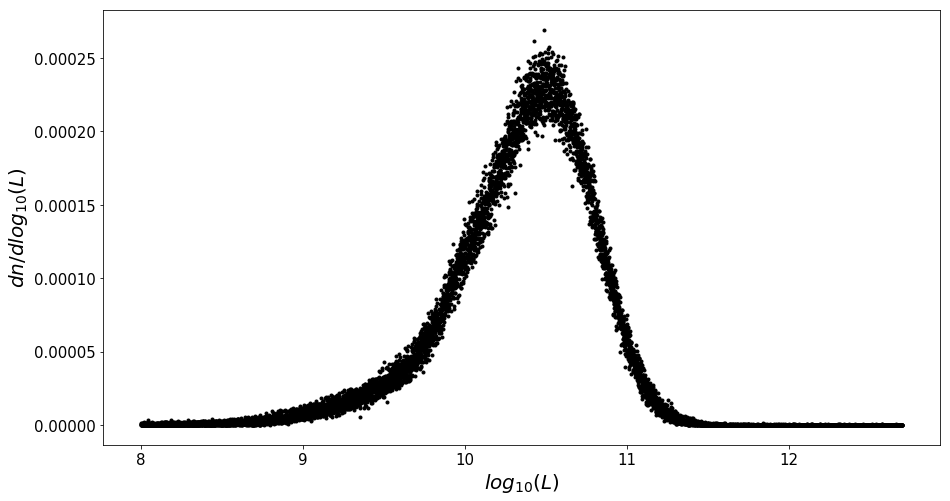

In [59]:
x=np.log10(10**8)
y=np.log10(5*10**12)
num_bin=10000
hist,bins=np.histogram(L_log10, bins = num_bin, range=(x,y))
dlog=(y-x)/num_bin
f=(hist/(v_survey*dlog))

log_range=[]
for i in range(num_bin):
    log_range.append(x+dlog/2+i*dlog)

plt.figure(figsize=[15,8])  
plt.plot(log_range, f, '.k')
plt.xlabel("$log_{10}(L)$",fontsize=20)
plt.ylabel("$dn/dlog_{10}(L)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Confronting Malmquist bias

At this point, you should have a first draft of a luminosity function. Inspecting the result suggests that there are very few low-luminosity galaxies. However, this is not a correct result, but is instead the result of __*Malmquist bias*__. This is because low-luminosity galaxies can't be seen to high redshifts, so we are missing a whole bunch of them in our survey.

__Exercise__: Let's get a visual representation of our bias. Plot a 2D histogram of the redshift and absolute $r$-band magnitudes of our galaxies. This will look like a heat map that tells us the distribution of absolute magnitudes of the galaxies in our sample for each redshift. I recommend limiting the plot to the range $-25$ to $-15$ for the $r$-band magnitude and $0$ to $0.3$ for the redshift.

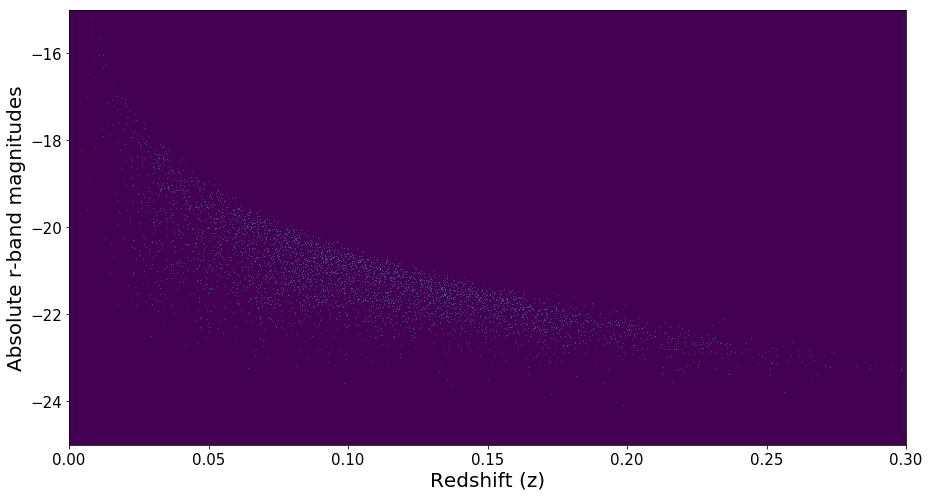

In [60]:
plt.figure(figsize=[15,8])  
plt.hist2d(sample_final['z'],abs_mag,bins=8000,range=[[0,0.3],[-25,-15]])
plt.xlabel("Redshift (z)",fontsize=20)
plt.ylabel("Absolute r-band magnitudes",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

__Exercise__: You should see a sharp edge in your 2D histogram. Does this make sense? Given that the faintest *apparent* magnitude that can be seen in this survey is $17.77$, can you plot of prediction of where this edge ought to be? If you like, you can reproduce the plot above and overlay your curve.

In [ ]:
## A little discussion here

In [ ]:
## Your code here

## Correcting Malmquist bias

One relatively straightforward---yet effective---way to correct Malmquist bias is to use the $1/V_\textrm{max}$ method. The basic idea is that if I know the luminosity of an object and the magnitude limit of my survey, I can compute the maximum distance to which the object could possibly be detected. From this, I can compute the volume $V_\textrm{max}$ over which the object can be found. The way to correct for Malmquist bias is then to *weight* my histogram so that each galaxy counts not as one galaxy, but as $V / V_\textrm{max}$. To see why this makes sense, let's consider a concrete example where a particular galaxy has $V / V_\textrm{max} =2$. This means that the galaxy is faint enough that I probably only saw galaxies of this luminosity over half of the survey (the "nearer half"). To get a fair sample of galaxies, I ought to count this galaxy twice, because chances are there was one more galaxy of this luminosity in the other half of the survey.

__Exercise__: Implement a $V/V_\textrm{max}$ weighting for the luminosity function. You will need to compute $V_\textrm{max}$ for each galaxy. (Hint: `np.histogram` has a very handy optional argument called `weights`). Plot the result.

In [ ]:
## Your code here

## Discussion

You should find that after having corrected for the Malmquist bias, the luminosity function rises as one goes to lower luminosities. In other words, most galaxies in our Universe are dim galaxies. <a href="http://adsabs.harvard.edu/abs/1976ApJ...203..297S">Schechter (1976)</a> showed that luminosity functions are well-fit by the form
\begin{equation}
\frac{dn}{dL} = \frac{\phi_\star}{L_\star} \left(\frac{L}{L_\star}\right)^{\alpha}\exp(-L/L_\star),
\end{equation}
where $\phi_\star$, $\alpha$, and $L_\star$ are free parameters that can be fit using observations. (If you have lots of free time this week, try fitting your SDSS luminosity function to the Schechter form!)

The luminosity function of galaxies is a key quantity that can provide clues as to how galaxies form. For example, we might ask why there are so many more faint galaxies than bright ones. One hypothesis might be that there is a one-to-one correspondence between dark matter halos and the galaxies, with more massive dark matter halos hosting more luminous galaxies. However, it turns out that this simple model doesn't quite work, as the following cartoon shows:

<div>
<img src="images/MFLF.png" width="400">
</div>
<center>
    Image credit: Silk & Mamon
</center>

The red theory curve is what one gets if one assumes that luminous matter simply follows dark matter halos. (Ask me---for example by submitting a question slip---if you'd like to know how one goes about making such a theory prediction). It is clear that the theory overpredicts things at both ends of luminosity. The current thinking is that this is a sign of *feedback*. At the low-mass/low-luminosity end, supernovae explosions inject enough energy into the interstellar medium to push gas out of the gravitational potential wells of dark matter halos, making it difficult to form stars (i.e., the luminous components of a galaxy). On the high-mass end, supermassive black hole engines similarly inject energy and suppress star formation.

## Submitting your work

Don't forget to push a copy of your completed notebook to your Github repo for marking!